In [1]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt

from jarvis.config.project_manager import ProjectManager
from jarvis.dataset.dataset2D import Dataset2D
from jarvis.efficienttrack.efficienttrack import EfficientTrack

project = ProjectManager()
project.load('Example_Project')

#project.create_new(
#    name = 'Example_Project',
#    dataset2D_path = 'Example_Dataset',
#    dataset3D_path = 'Example_Dataset')

cfg = project.get_cfg()

Successfully loaded project Pancake.


In [2]:
#Load the training and validation sets

training_set = Dataset2D(project.cfg, set='train', mode = 'KeypointDetect')
val_set = Dataset2D(project.cfg, set='val',mode = 'KeypointDetect')

In [ ]:
#Configuring the network for training

weights = 'pretrained/Monkey_Example/EfficientTrack_Keypoints.pth'
keypointDetect = EfficientTrack('KeypointDetect', cfg, None)
#keypointDetect.load_lates_weights()

In [ ]:
#Training the network for 100 epochs

keypointDetect.train(training_set, val_set, 6)

In [10]:
#Configuring the network for inferenct

weights = 'pretrained/Monkey_Example/EfficientTrack_Keypoints.pth'
keypointDetect = EfficientTrack('KeypointDetectInference', cfg, weights)
validationSetIndex = 0

Successfully loaded weights: /home/lambda2/Desktop/JARVIS-HybridNet/projects/Example_Project/models/KeypointDetect/Run_20220221-131106/EfficientTrack-d0_final.pth


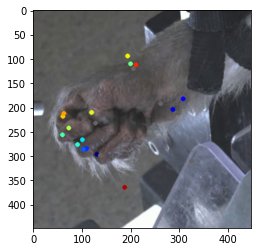

In [18]:
#Load item from validation set and show tracking result
validationSetIndex += 1
item = val_set.__getitem__(validationSetIndex)
imgs = item[0]
preds, confidence, img_vis = keypointDetect.predictKeypoints(imgs)
plt.imshow(img_vis/255.)
plt.show()